# What Machine Learning Techniques Perform Better under What Cirmstances
### Author: Weicheng Zhang Dun Lin, Yifan Qian 
### Date: 12/08/2018

---
### 1. When the data are non-linear, such as cubic function.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsRegressor

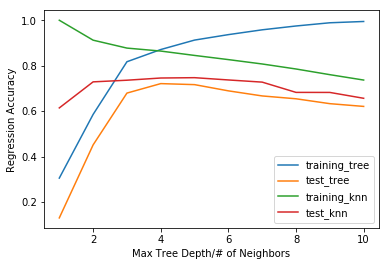

In [2]:
def cubicData(N,noise):
    X = np.random.uniform(size=(N,1),low=-5.,high=5.)
    addNoise = noise*np.random.standard_normal(size=N)
    y = -(X[:,0]+7.)**2. + X[:,0]**3.+addNoise
    return X,y

X,y = cubicData(100,10.)
nmc = 100
dtr_trainScore = np.zeros(nmc)
dtr_testScore  = np.zeros(nmc)
dtr_mean_trainScore = np.zeros(10)
dtr_mean_testScore = np.zeros(10)
knr_trainScore = np.zeros(nmc)
knr_testScore  = np.zeros(nmc)
knr_mean_trainScore = np.zeros(10)
knr_mean_testScore = np.zeros(10)

for d in range(10):
    dtr = DecisionTreeRegressor(max_depth = d+1)
    knr = KNeighborsRegressor(n_neighbors = d+1)
    for i in range(nmc):
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
        dtr_train = dtr.fit(X_train,y_train)
        knr_train = knr.fit(X_train,y_train)
        dtr_trainScore[i] = dtr_train.score(X_train,y_train)
        dtr_testScore[i] =  dtr_train.score(X_test,y_test)
        knr_trainScore[i] = knr_train.score(X_train,y_train)
        knr_testScore[i] =  knr_train.score(X_test,y_test)
    dtr_mean_trainScore[d] = np.mean(dtr_trainScore)
    dtr_mean_testScore[d] = np.mean(dtr_testScore)
    knr_mean_trainScore[d] = np.mean(knr_trainScore)
    knr_mean_testScore[d] = np.mean(knr_testScore)   
plt.plot(np.arange(1,11), dtr_mean_trainScore, label = "training_tree")
plt.plot(np.arange(1,11), dtr_mean_testScore, label = "test_tree")
plt.plot(np.arange(1,11), knr_mean_trainScore, label = "training_knn")
plt.plot(np.arange(1,11), knr_mean_testScore, label = "test_knn")
plt.xlabel("Max Tree Depth/# of Neighbors")
plt.ylabel("Regression Accuracy")
plt.legend()




In this exercise, we fitted a regression tree to the cubic data. To measure regression tree's performance, K-neast-neighbor was taken as reference. From the graph, when we increased tree's depth to until around 4, the test score kept increasing; when we kept increasing tree depth, training score gradually approached 1 but test score kept decreasing. However, K-nearest-neighbor regression outperformed regression tree based on our simulated data.

Conclusion: Decision Tree overfits easily.

---
### 2. In our linear functions, is there any conspicuous preference or difference between each other?

Compare ridge and lasso on some simulated data with a large number of forecasters (right hand side) variables. Run monte-carlos to compare the two. Are there differences? Can you make any statements about which is preferred?

In [32]:
import sys
import os
targetDirectory = os.path.abspath("../../introML/")
sys.path.append(targetDirectory)

%matplotlib inline
from preamble import *
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import graphviz
from sklearn.model_selection import train_test_split

In [34]:
# Function to generate linear data experiments
def genLinData(N,M,noise):
    # y = x_1 + x_2 .. x_M + eps
    # X's scaled so the variance of explained part is same order as noise variance (if eps = 1)
    sigNoise = np.sqrt(1./M)
    # set up random beta for regression
    beta = np.random.normal(size=(M,1),loc=0.,scale=1.)
    # force smaller beta to zero
    beta[abs(beta)<1.0] = 0.
    betaUsed= np.sum( abs(beta)>0.)
    X = np.random.normal(size=(N,M),loc=0,scale=sigNoise)
    eps = np.random.normal(size=(N,1),loc=0,scale=noise)
    # Modern Python with matrix multiplication
    y = X @ beta + eps
    # Old style Python
    # X = np.random.normal(size=(N,M),loc=0,scale=sigNoise)
    # eps = np.random.normal(size=N,loc=0,scale=noise)
    # y = np.sum(X,axis=1)+eps
    return X,y,betaUsed

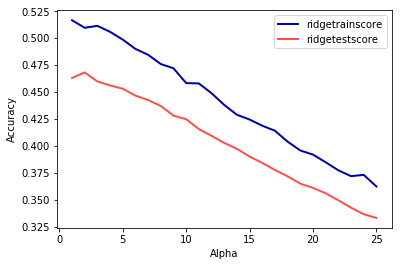

In [36]:
X, y, nvar = genLinData(2000,50,1.0)

# Now run regression
# print score, which is R-squared (fit)
nmc = 50
ridgetrainscore = []
ridgetestscore = []
a = range(1, 26, 1)
    
for alpha in a:
    ridgetrains = np.zeros(nmc)
    ridgetests = np.zeros(nmc)
    for i in range(nmc):
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
        ridge = Ridge(alpha = alpha).fit(X_train, y_train)
        ridgetrains[i] = ridge.score(X_train,y_train)
        ridgetests[i] = ridge.score(X_test,y_test)
    ridgetrainscore.append(np.mean(ridgetrains))
    ridgetestscore.append(np.mean(ridgetests))

plt.plot(a, ridgetrainscore, label = "ridgetrainscore")
plt.plot(a, ridgetestscore, label = "ridgetestscore")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.legend()

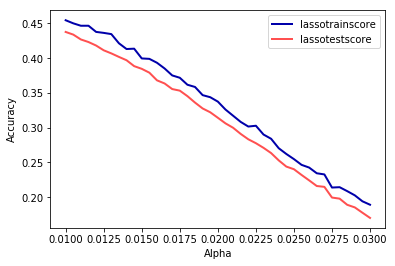

In [37]:
lassotrainscore = []
lassotestscore = []
a = np.arange(0.01, 0.0305, 0.0005)

for alpha in a:
    lassotrains = np.zeros(nmc)
    lassotests = np.zeros(nmc)
    for i in range(nmc):
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)
        lasso = Lasso(alpha = alpha).fit(X_train, y_train)
        lassotrains[i] = lasso.score(X_train,y_train)
        lassotests[i] = lasso.score(X_test,y_test)
    lassotrainscore.append(np.mean(lassotrains))
    lassotestscore.append(np.mean(lassotests))
    
plt.plot(a, lassotrainscore, label = "lassotrainscore")
plt.plot(a, lassotestscore, label = "lassotestscore")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.legend()

### Conclusion: when shall we use linear regression
* Under most circumstances ridge and lasso perform quite similarly. But when the data are quite random, linear regression performs badly.
* In the case when some variables show significant impact on dependent variable, Lasso is preferred since it forces more on some particular variables and let go others to avoid overfitting. But when all the variables perform similarly on the dependent variables, Ridge is preferred.

---
### 3. How to overcome overfitting in regression tree and linear regression

Based on our previous analysis, we see that regression tree easily overfits. In linear regression, if there are not enough data, how can we address overfitting? We believe introduce some randomness will help.

In [10]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
matrixlinSVC = []
matrixlinREG = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(
        cancer.data, cancer.target, stratify=cancer.target)
    linSVC = LinearSVC(C=0.1).fit(X_train,y_train)
    lr = LinearRegression().fit(X_train, y_train)
    matrixlinSVC.append(linSVC.score(X_test, y_test))
    matrixlinREG.append(lr.score(X_test, y_test))
print("Mean score for LinearSVC.{:.3f}".format(np.mean(matrixlinSVC)))
print("Mean score for Linear Regression.{:.3f}".format(np.mean(matrixlinREG)))

Mean score for LinearSVC.0.880
Mean score for Linear Regression.0.739


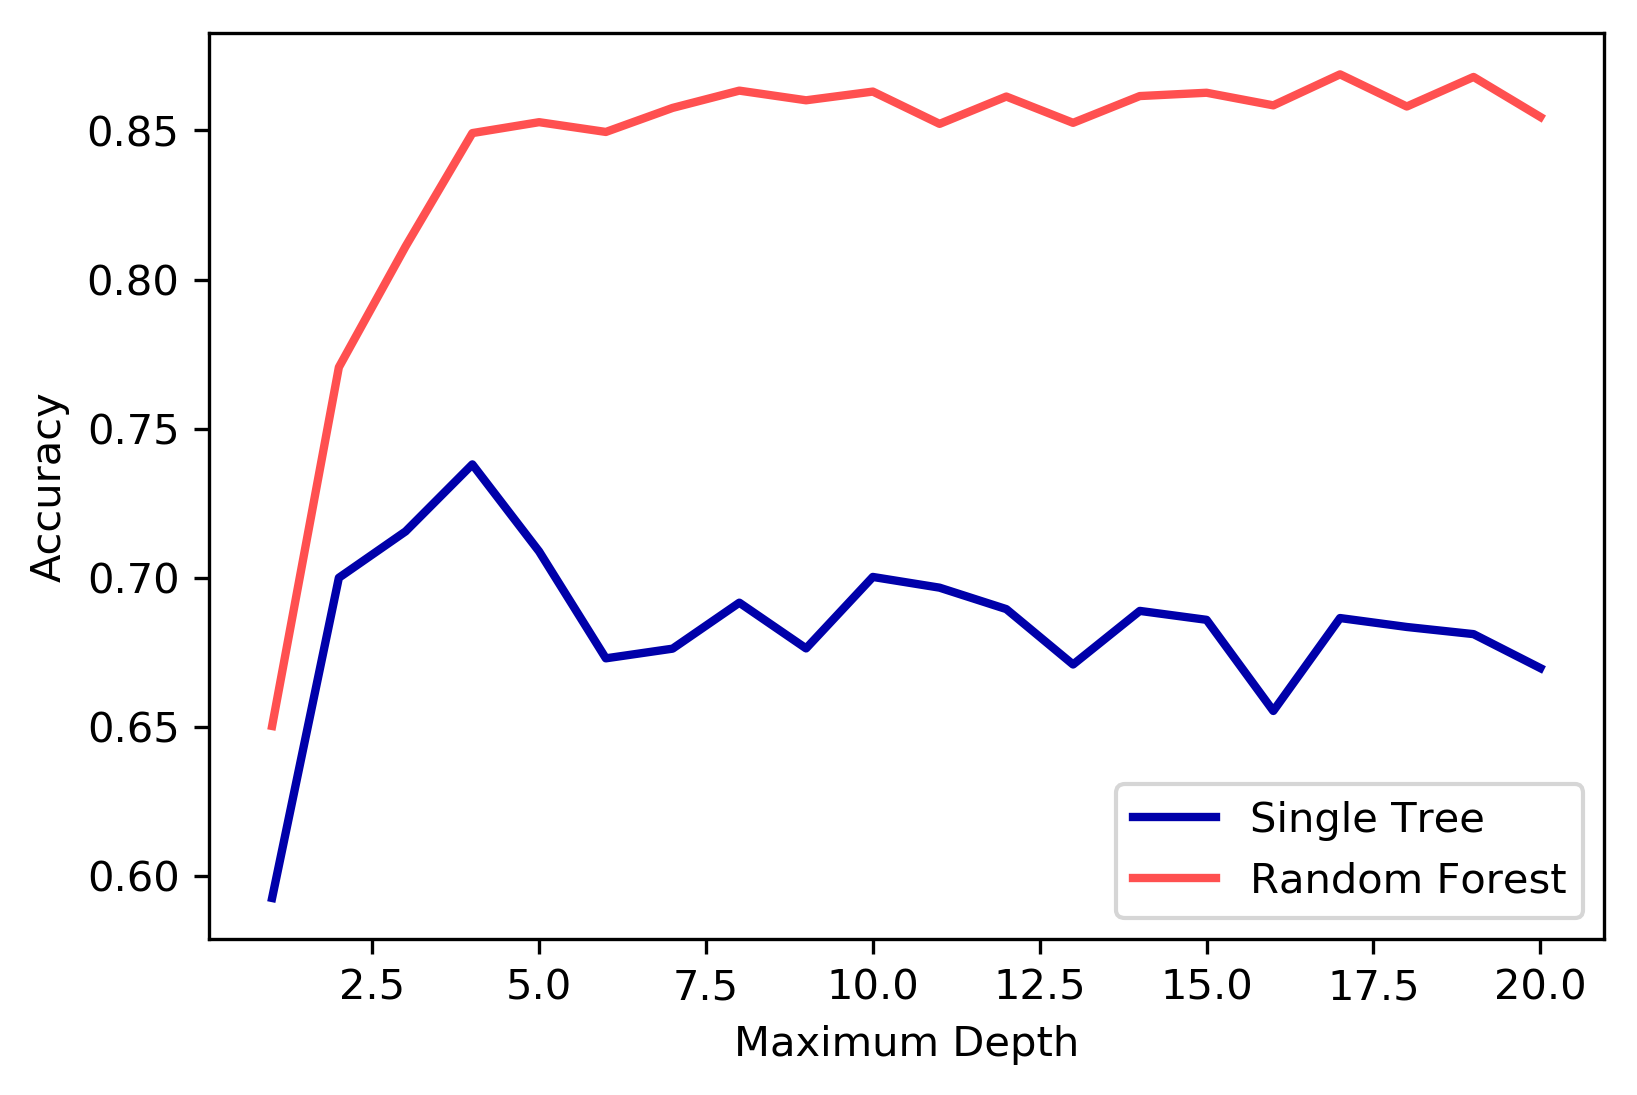

In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
cancer = load_breast_cancer()
treetest = []
foresttest = []
for d in range(1,21):
    matrixDT = []
    matrixRF = []
    for i in range(50):
        X_train, X_test, y_train, y_test = train_test_split(
            cancer.data, cancer.target, stratify=cancer.target)
        tree = DecisionTreeRegressor(max_depth=d).fit(X_train, y_train)
        forest = RandomForestRegressor(n_estimators=100,max_depth=d,max_features=2).fit(X_train, y_train)
        matrixDT.append(tree.score(X_test, y_test))
        matrixRF.append(forest.score(X_test, y_test))
    treetest.append(np.mean(matrixDT))
    foresttest.append(np.mean(matrixRF))
    
plt.plot(np.arange(1,21), treetest, label = "Single Tree")
plt.plot(np.arange(1,21), foresttest, label = "Random Forest")
plt.xlabel("Maximum Depth")
plt.ylabel("Accuracy")
plt.legend()

### Benefit of randomness
We contrast Linear SVC with linear regression. Linear SVC invloves randomness while linear regression does not. Because linear regression has a formula and the result is always the same for the same data, no matter how many times we fit it. We can see the mean test score for LinearSVC is 0.896 which is higher than that for Linear Regression (0.725).

Besides, we contrast Decision Tree with Random Forest. A main drawback of decision trees is that they tend to overfit the training data. Random forests are one way to address this problem. A random forest injects randomness into the tree by ensuring each tree is slightly different from the others. When we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. This reduction in overfitting, while retaining the predictive power of the trees.

A critical parameter in this process is max_features. If we set max_features to n_features, that means that each split can look at all features in the dataset, and no randomness will be injected in the feature selection. If we set max_features to 1, that means search over different thresholds for the feature that was selected randomly. Therefore, a high max_fea tures means that the trees in the random forest will be quite similar, and they will be able to fit the data easily, using the most distinctive features. A low max_features means that the trees in the random forest will be quite different, and that each tree might need to be very deep in order to fit the data well. Therefore, random forest is able to pick the most distinct features from all of the variables and reduce overfitting.

In conclusion, by adding some randomness into our model, we can filter out the features that not contribute a lot to our dependent variable, thus we are able to deal with overfitting.

### 4. Can we further improve random forest? To which degree does randomness improve our model?

Based on our previous analysis, randomness help to address overfitting, and though random forest perfom the best till now, is there any possibility that we further improve our model?

In [13]:
df = pd.read_csv("../../data/Titanictrain.csv",index_col='PassengerId')
# restrict to fields of interest
df = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Survived']]
# map sex to 0, 1 values
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
# drop missing data
df = df.dropna()
y=df['Survived']
X = df.drop('Survived',axis=1)

In [14]:
nmc=100
dtc=DecisionTreeClassifier(max_depth=5)
dtc_trainscores = np.zeros(nmc)
dtc_testscores = np.zeros(nmc)
lr=LogisticRegression()
lr_trainscores = np.zeros(nmc)
lr_testscores = np.zeros(nmc)
forest = RandomForestClassifier(n_estimators=100,max_depth=5,random_state=0)
forest_trainscores = np.zeros(nmc)
forest_testscores = np.zeros(nmc)
gbrt = GradientBoostingClassifier(n_estimators=100,max_depth=5,learning_rate=0.05,random_state=0)
gbrt_trainscores = np.zeros(nmc)
gbrt_testscores = np.zeros(nmc)

for i in range(nmc):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
    dtc.fit(X_train,y_train)
    lr.fit(X_train,y_train)
    forest.fit(X_train,y_train)
    gbrt.fit(X_train,y_train)
    dtc_trainscores[i] = dtc.score(X_train,y_train)
    dtc_testscores[i]  = dtc.score(X_test,y_test)
    lr_trainscores[i] = lr.score(X_train,y_train)
    lr_testscores[i]  = lr.score(X_test,y_test)  
    forest_trainscores[i] = forest.score(X_train,y_train)
    forest_testscores[i]  = forest.score(X_test,y_test)
    gbrt_trainscores[i] = gbrt.score(X_train,y_train)
    gbrt_testscores[i]  = gbrt.score(X_test,y_test)    
    
stat = {'train_mean':[np.mean(lr_trainscores),np.mean(dtc_trainscores),np.mean(forest_trainscores),np.mean(gbrt_trainscores)],
       'test_mean':[np.mean(lr_testscores),np.mean(dtc_testscores),np.mean(forest_testscores),np.mean(gbrt_testscores)],
       'train_std':[np.std(lr_trainscores),np.std(dtc_trainscores),np.std(forest_trainscores),np.std(gbrt_trainscores)],
       'test_std':[np.std(lr_testscores),np.std(dtc_testscores),np.std(forest_testscores),np.std(gbrt_testscores)]}
data_frame = pd.DataFrame(data=stat,index=['logistic regression','decision tree','random forest','boosting'])
data_frame


,train_mean,test_mean,train_std,test_std
logistic regression,0.80,0.79,1.07e-02,0.02
decision tree,0.86,0.79,1.02e-02,0.03
random forest,0.87,0.81,9.62e-03,0.02
boosting,0.95,0.81,6.70e-03,0.03


It can be seen from above that although logistic regression and decision tree have similar performance on test data, decision tree has lower standard deviatiton. Thus, decision tree has more stable performance. While both random forest and boosting tree have improved accuracy and stability on test data. Also, by introducing the lesson speed to our model, we can further increase our performance based on the decision tree. But by doing so, we sacrifice much time since gradient bossting is much slower than random forest. As a result, it's hard to tell whether random forest or boosting tree is better but they did outperform logistic regression and decision tree based on this simulation.

---
## Application of aforementioned machine learning algorithms on "Advrtising" data set

---
#### Load tools

In [15]:
# Import lots of tools
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression

#### Load and process data

In [23]:
def Load_Ad_Data(N_categories):
    ad = pd.read_csv("../../data/Advertising.csv")
    # set up data for scikit-learn
    y = ad.values[:,4]
    # These are predictors
    Xall= ad.values[:,1:3]
    # copy of all data to predictor
    X = Xall.copy()
    
    #create different category to be classified
    ybin = []
    if N_categories not in [2,3]:
        N_categories = 2
    if N_categories == 3:
        for item in y:
            if item< 9:
                ybin.append(0)
            elif 8.9 < item < 16:
                ybin.append(1)
            elif item > 15.9:
                ybin.append(2)
    elif N_categories == 2:
        ybin = y>12
    
    ad['quality'] = ybin
    
    return X,y,ybin

#### Try Different Classifier

In [17]:
def Try_Different_Classifier(model, x_train, y_train, x_test, y_test):   
    model.fit(x_train,y_train)
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test, y_test)
    return train_score, test_score

#### Try Different Regression

In [18]:
def Try_Different_Regression(model, x_train, y_train, x_test, y_test):
    model.fit(x_train,y_train)
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    result = model.predict(x_test)
    plt.figure()
    plt.plot(np.arange(len(result)), y_test,'go-',label='true value')
    plt.plot(np.arange(len(result)),result,'ro-',label='predict value')
    plt.title('Train: %.2f , Test: %.2f'%(train_score,test_score))
    plt.legend()
    plt.show()

### -----Main Code Begin Here-----

The main purpose is to compare classifier and regression of two methods, support vector and decision tree. We chose this advertising dataset, and we manually divided the column "sale" into two or three categories, based on sale's value. Then in each method, we use both classifier and regression to fit the training data and then see how its test score varies.

###  1. SVC & SVR
#### 1.1 Linear Classifier

In [24]:
X,y,ybin=Load_Ad_Data(2)

In [25]:
# start monte-carlo for SVC
#Remember to define how many categories do you want (2 or 3).
C = (100,1,0.01)
nmc = 50
for c in C:
    svc = LinearSVC(C=c)
    train = np.zeros(nmc)
    test  = np.zeros(nmc)
    for i in range(nmc):
        X_train, X_test, y_train, y_test = train_test_split(X,ybin,test_size=0.2)
        train_score, test_score = Try_Different_Classifier(svc,X_train, y_train, X_test, y_test)
        train[i] = train_score
        test[i] = test_score
    print("------When C equals %.2f------"%c)
    print("The mean of training score is: %.4f"%np.mean(train))
    print("The s.d. of training score is: %.4f"%np.std(train))
    print("The mean of testing score is: %.4f"%np.mean(test))
    print("The s.d. of testing score is: %.4f"%np.std(train))

------When C equals 100.00------
The mean of training score is: 0.7093
The s.d. of training score is: 0.1935
The mean of testing score is: 0.7045
The s.d. of testing score is: 0.1935
------When C equals 1.00------
The mean of training score is: 0.7411
The s.d. of training score is: 0.1712
The mean of testing score is: 0.7425
The s.d. of testing score is: 0.1712
------When C equals 0.01------
The mean of training score is: 0.8631
The s.d. of training score is: 0.0242
The mean of testing score is: 0.8520
The s.d. of testing score is: 0.0242


#### 1.2 Classifier

In [26]:
# start monte-carlo for SVC
for c in C:
    svc = SVC(kernel='rbf',C=c)
    train = np.zeros(nmc)
    test  = np.zeros(nmc)
    for i in range(nmc):
        X_train, X_test, y_train, y_test = train_test_split(X,ybin,test_size=0.2)
        train_score, test_score = Try_Different_Classifier(svc,X_train, y_train, X_test, y_test)
        train[i] = train_score
        test[i] = (test_score)
    print("------When C equals %d------"%c)
    print("The mean of training score is: %.4f"%np.mean(train))
    print("The s.d. of training score is: %.4f"%np.std(train))
    print("The mean of testing score is: %.4f"%np.mean(test))
    print("The s.d. of testing score is: %.4f"%np.std(train))

------When C equals 100------
The mean of training score is: 1.0000
The s.d. of training score is: 0.0000
The mean of testing score is: 0.6645
The s.d. of testing score is: 0.0000
------When C equals 1------
The mean of training score is: 1.0000
The s.d. of training score is: 0.0000
The mean of testing score is: 0.6330
The s.d. of testing score is: 0.0000
------When C equals 0------
The mean of training score is: 0.5720
The s.d. of training score is: 0.0175
The mean of testing score is: 0.5620
The s.d. of testing score is: 0.0175


#### 1.3 Regression

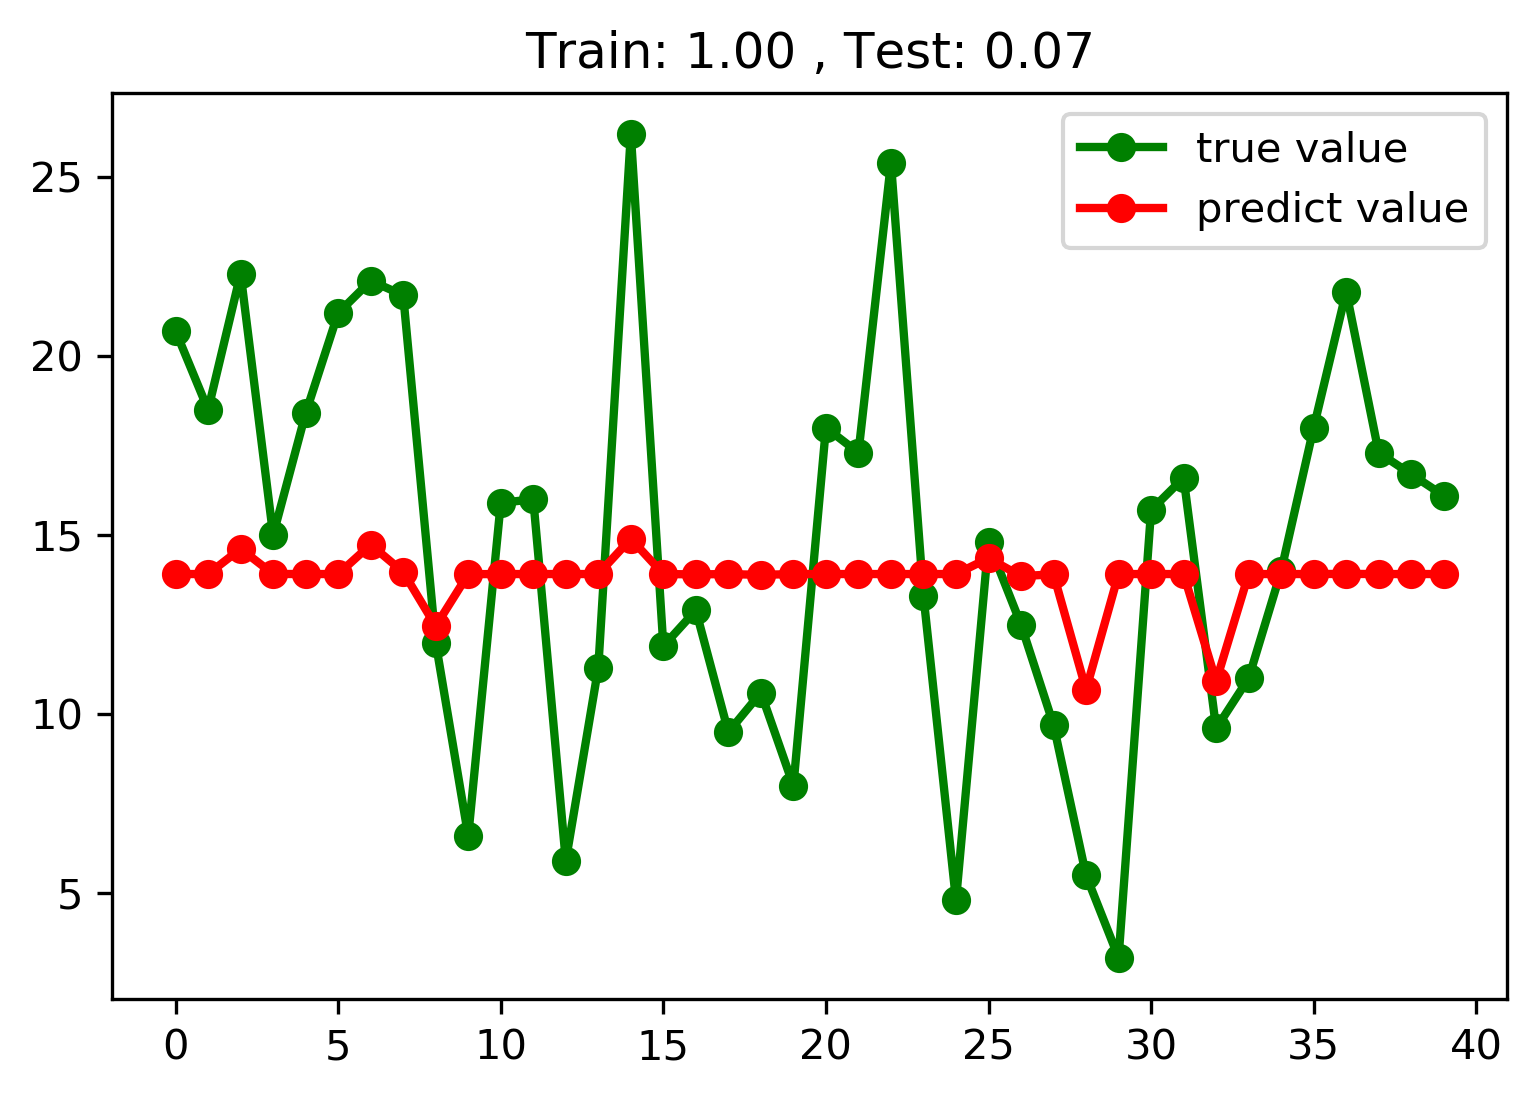

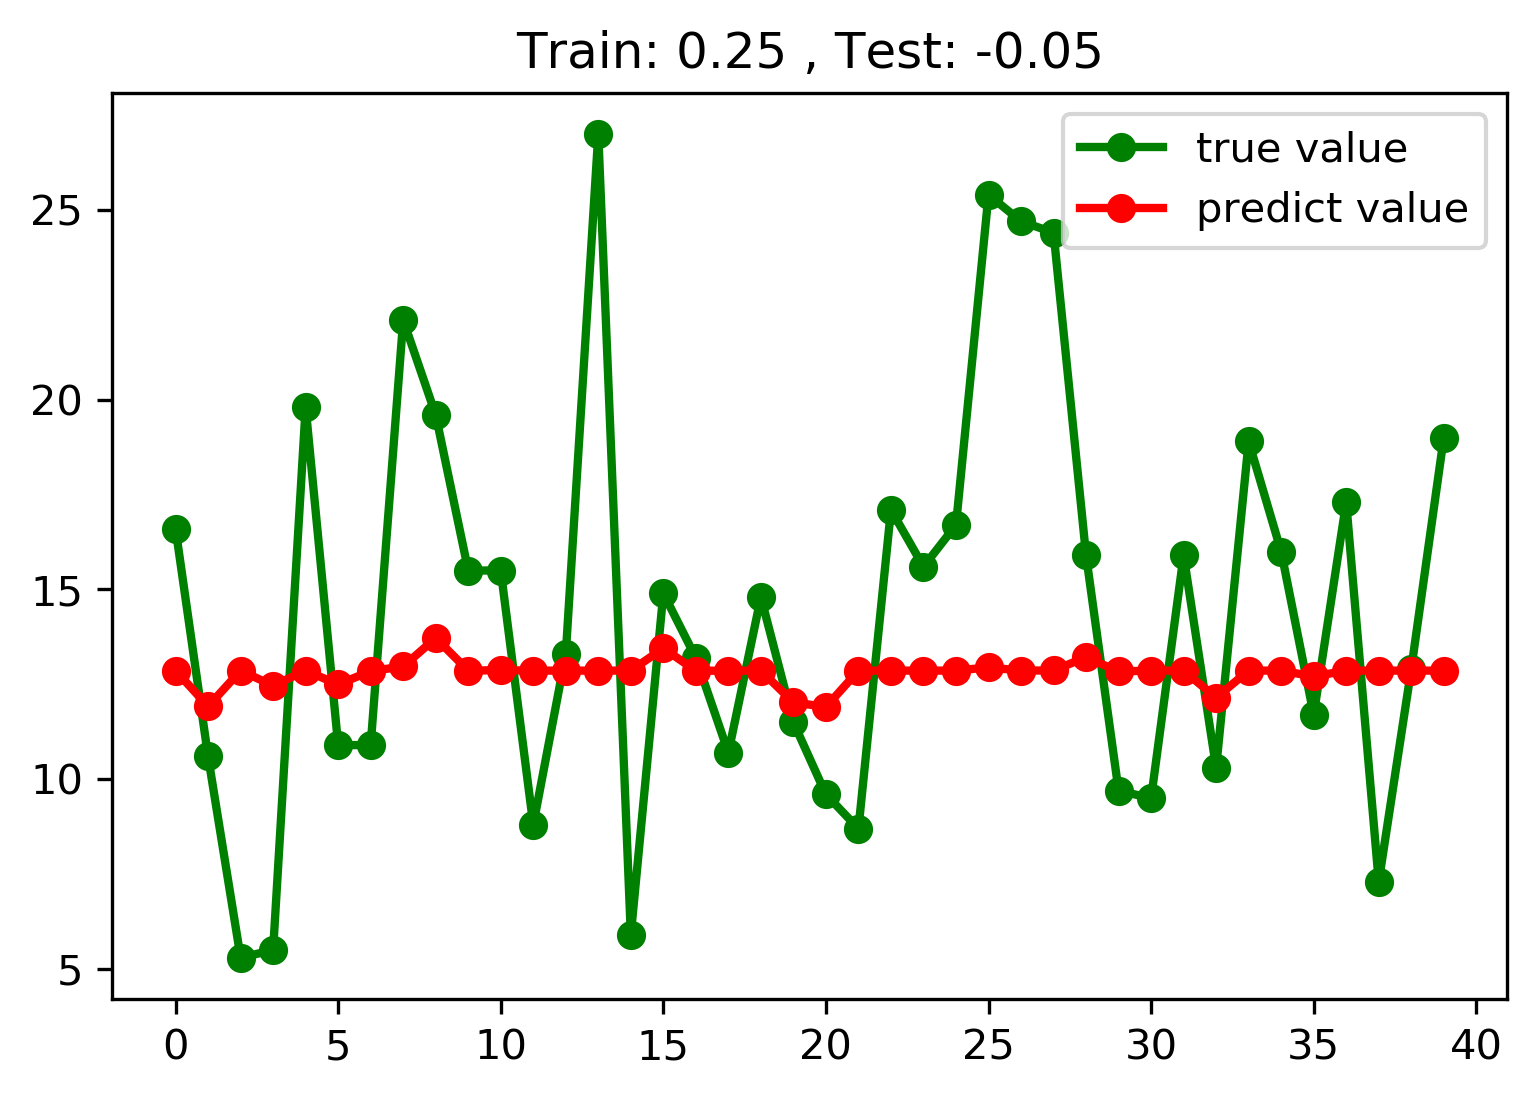

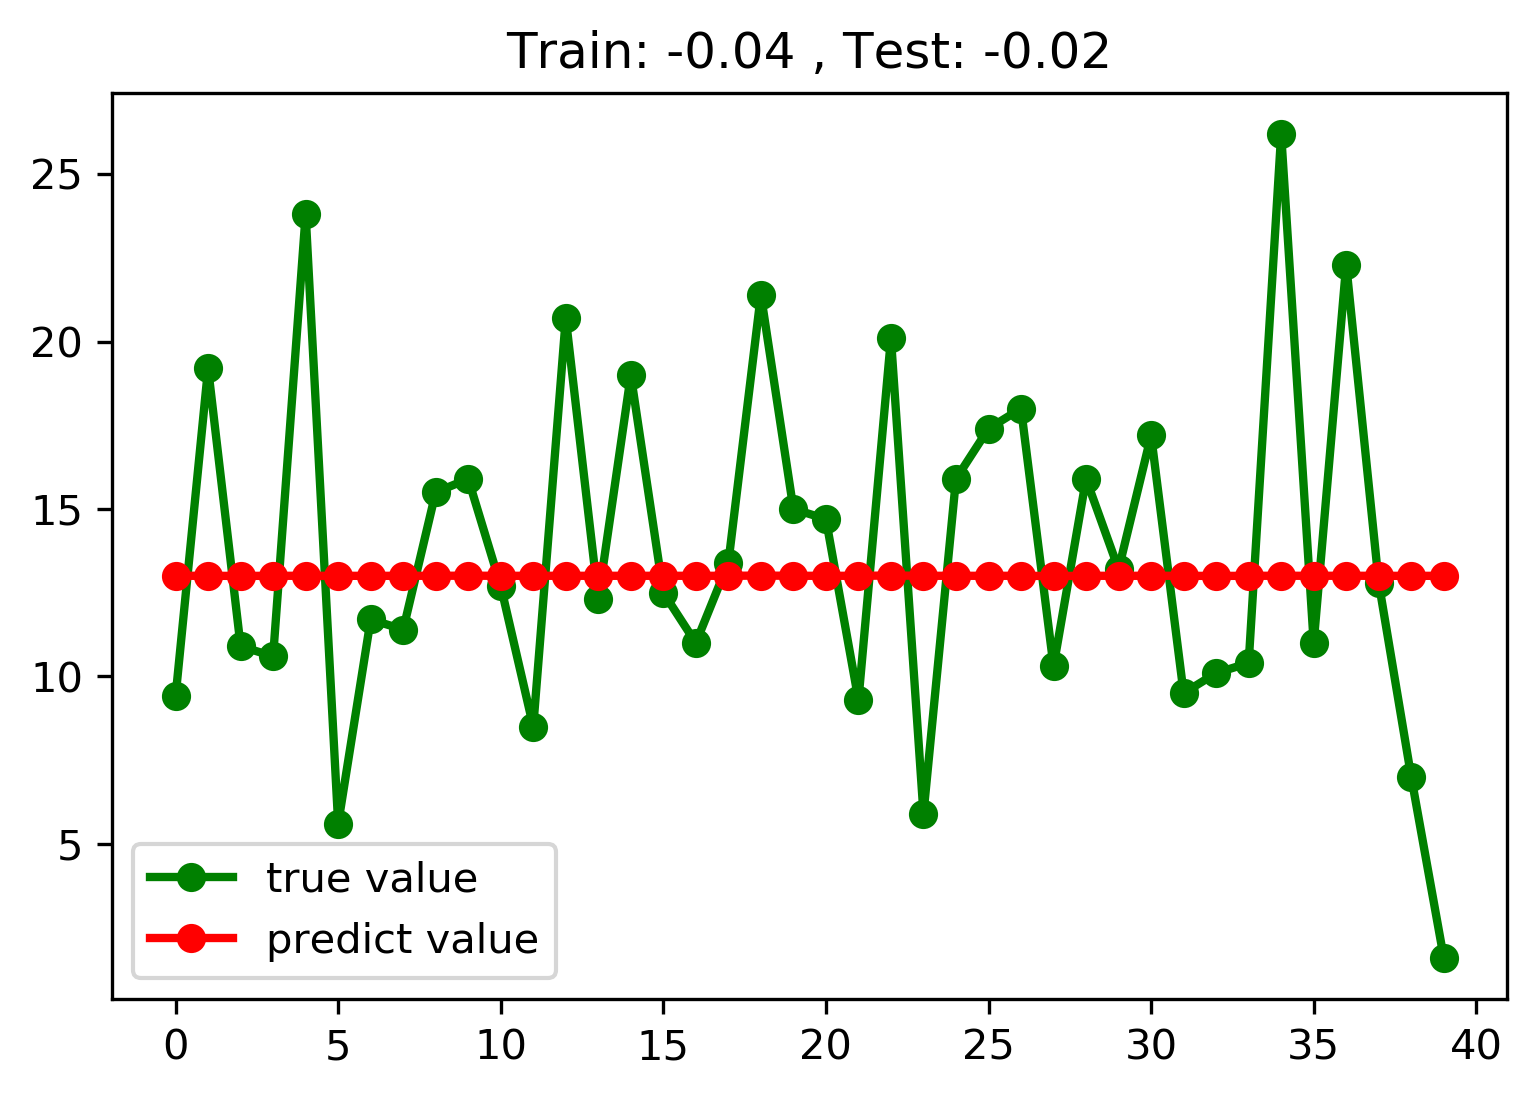

In [27]:
# start monte-carlo for SVR
for c in C:
    svr = SVR(kernel='rbf',C=c)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    Try_Different_Regression(svr,X_train, y_train, X_test, y_test)

We can see that the only the linear SVC yields an acceptable result. When C=0.01 it has a score of 0.86. But in the non-linear SVC and the SVR, both models don't have any practical value. Also, for the non-linear SVC and SVR with C=100, they exhibit a very severe over-fitting.

### 2. Decision Tree
#### 2.1 Classification

In [28]:
D = (5, 10, 25)
for d in D:
    dtc = DecisionTreeClassifier(max_depth=d)
    train = np.zeros(nmc)
    test  = np.zeros(nmc)
    for i in range(nmc):
        X_train, X_test, y_train, y_test = train_test_split(X,ybin,test_size=0.20)
        train_score, test_sore = Try_Different_Classifier(dtc,X_train, y_train, X_test, y_test)
        train[i] = train_score
        test[i] =  test_score  
    print("------When max depth equals %d------"%d)
    print("The mean of training score is: %f"%np.mean(train))
    print("The s.d. of training score is: %.4f"%np.std(train))
    print("The mean of testing score is: %f"%np.mean(test))
    print("The s.d. of testing score is: %.4f"%np.std(train))
    

------When max depth equals 5------
The mean of training score is: 0.993500
The s.d. of training score is: 0.0050
The mean of testing score is: 0.525000
The s.d. of testing score is: 0.0050
------When max depth equals 10------
The mean of training score is: 1.000000
The s.d. of training score is: 0.0000
The mean of testing score is: 0.525000
The s.d. of testing score is: 0.0000
------When max depth equals 25------
The mean of training score is: 1.000000
The s.d. of training score is: 0.0000
The mean of testing score is: 0.525000
The s.d. of testing score is: 0.0000


#### 2.2 Regression

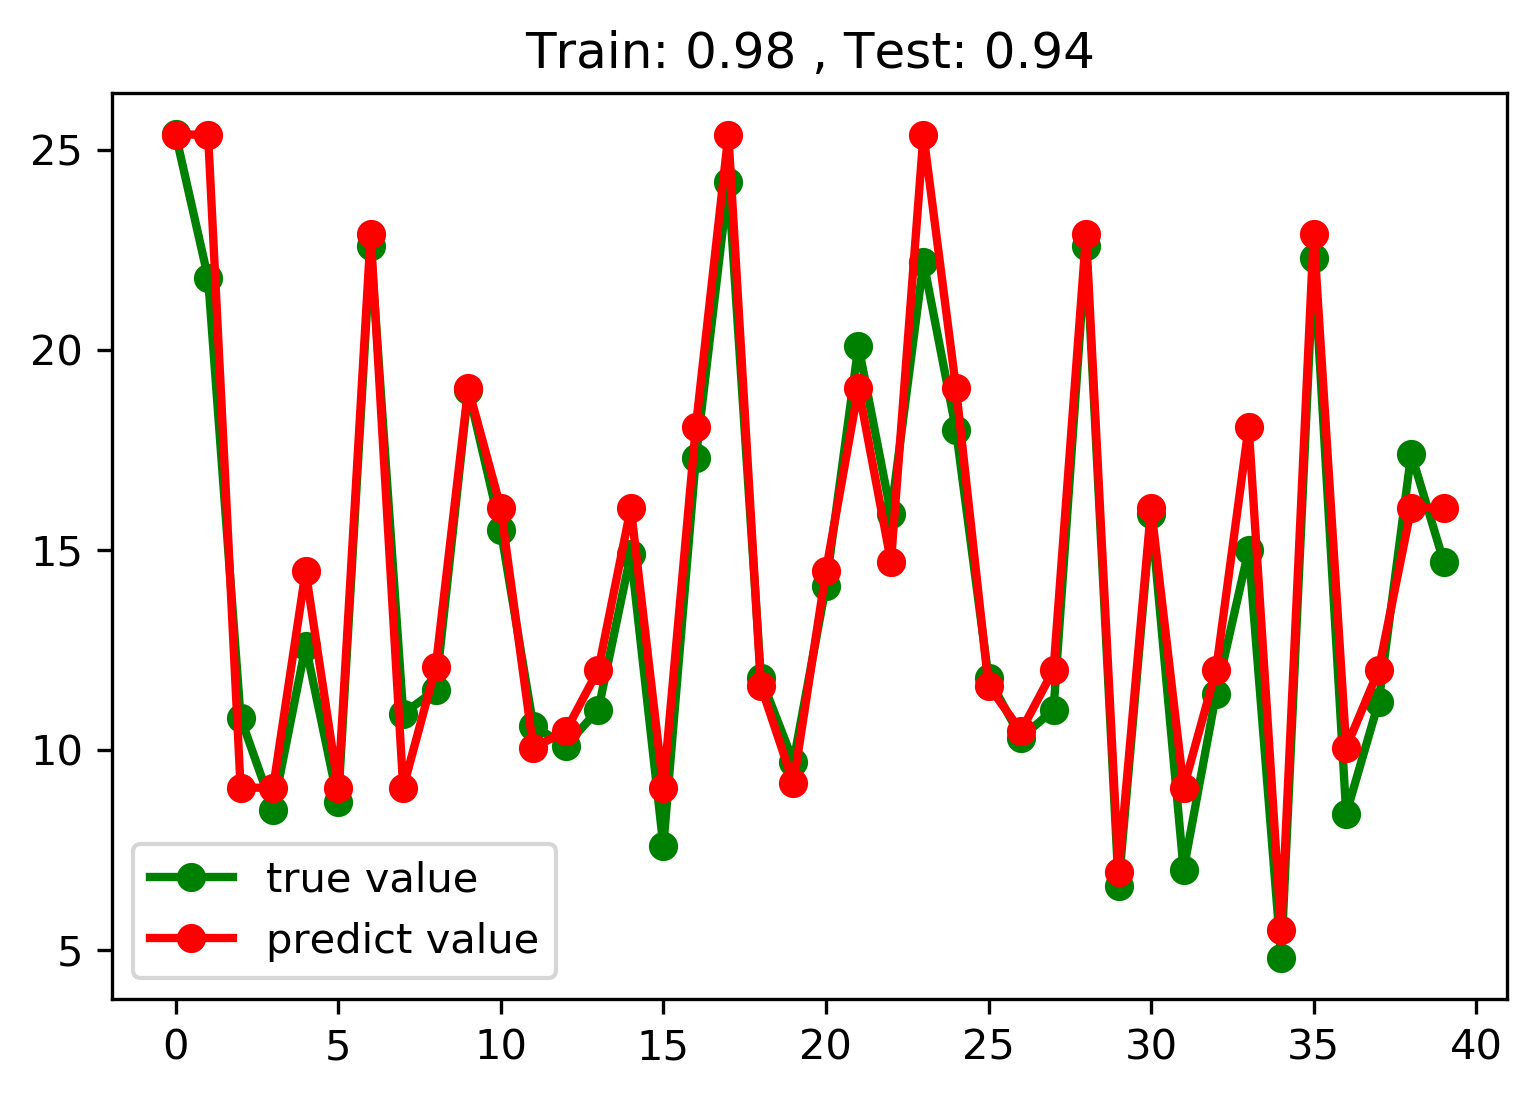

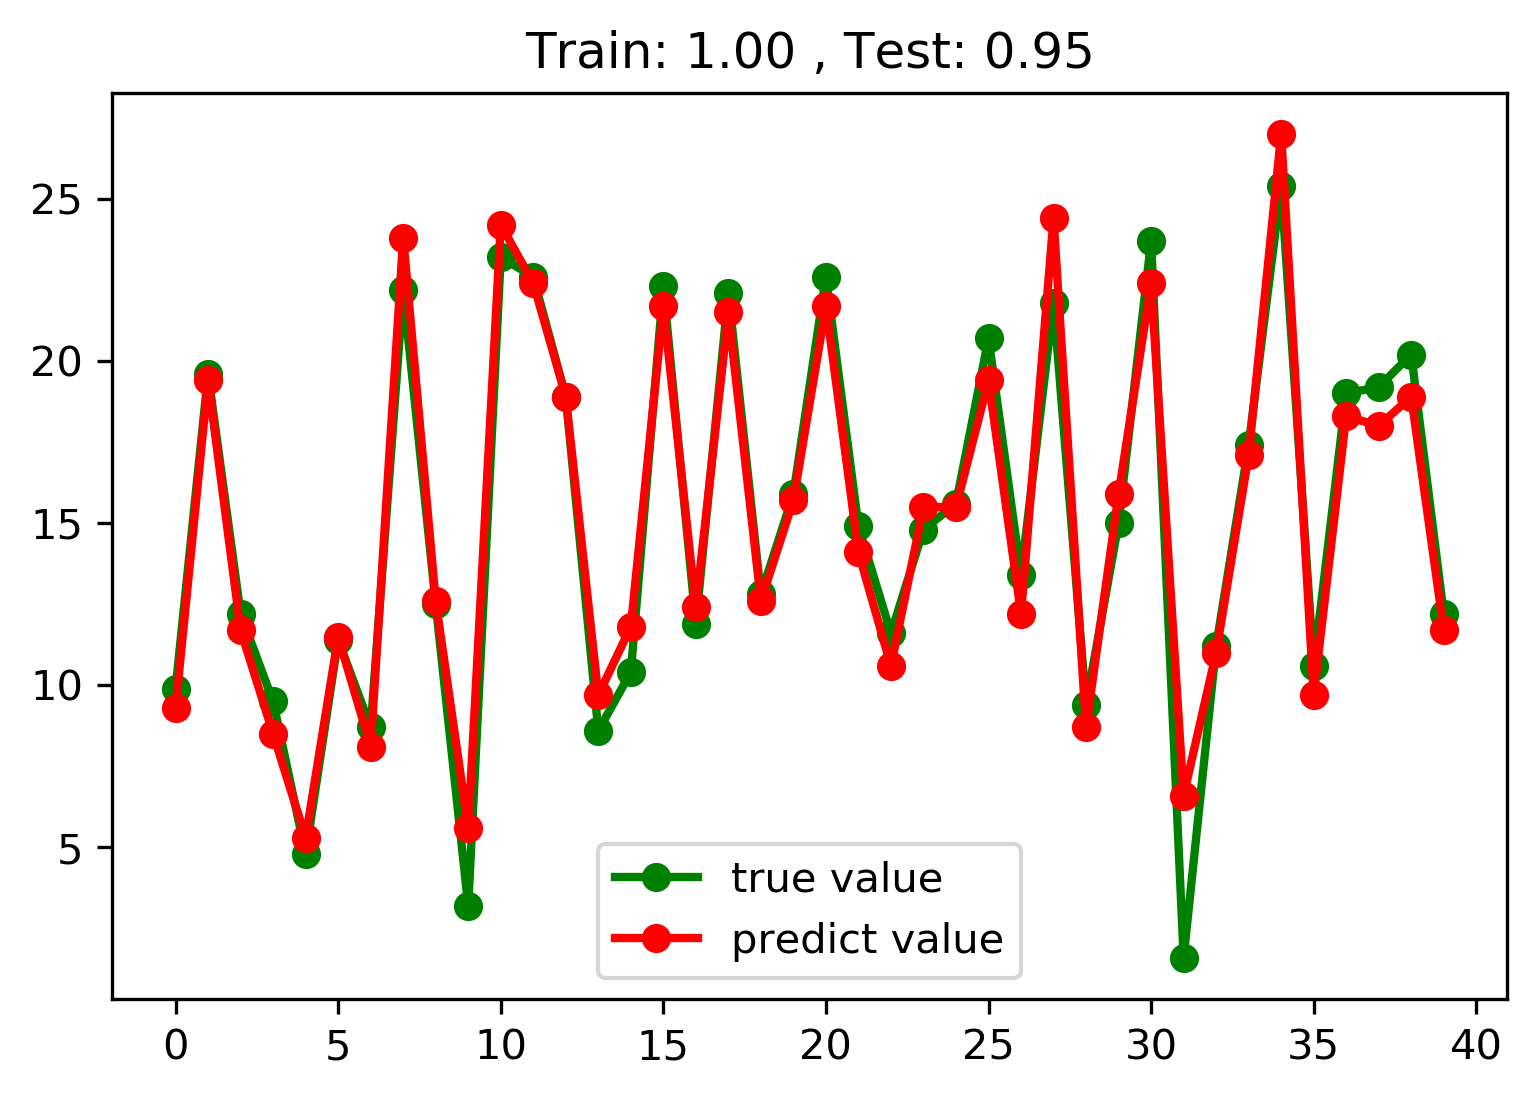

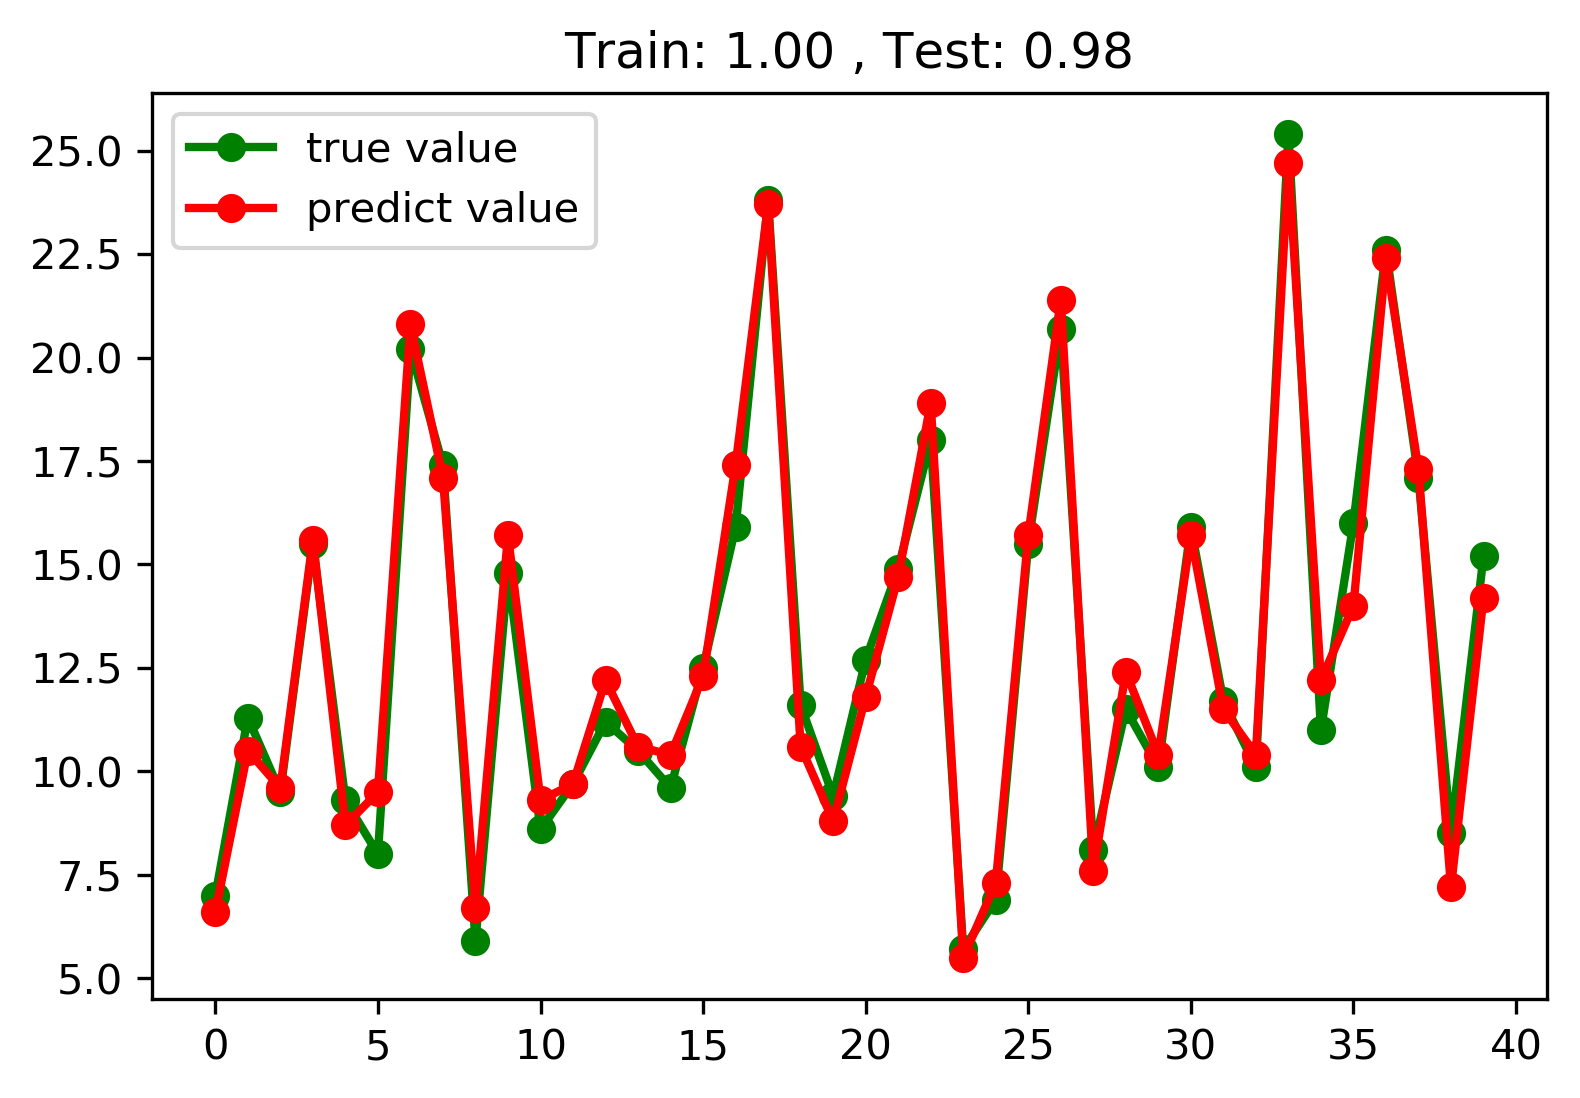

In [29]:
D = (5, 10, 25)
for d in D:
    dtr = DecisionTreeRegressor(max_depth=d)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
    Try_Different_Regression(dtr,X_train, y_train, X_test, y_test)

Decision tree is very potent in both classification and regression.

### 3. Random Forest
#### 3.1 Classifier

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,ybin,test_size=0.20)
rfc = RandomForestClassifier(n_estimators = 20)
trainscore,testscore = Try_Different_Classifier(rfc,X_train, y_train, X_test,  y_test)
print("Train score: %.2f"%trainscore)
print("Test score: %f"%testscore)

Train score: 1.00
Test score: 0.875000


#### 3.2 Regression

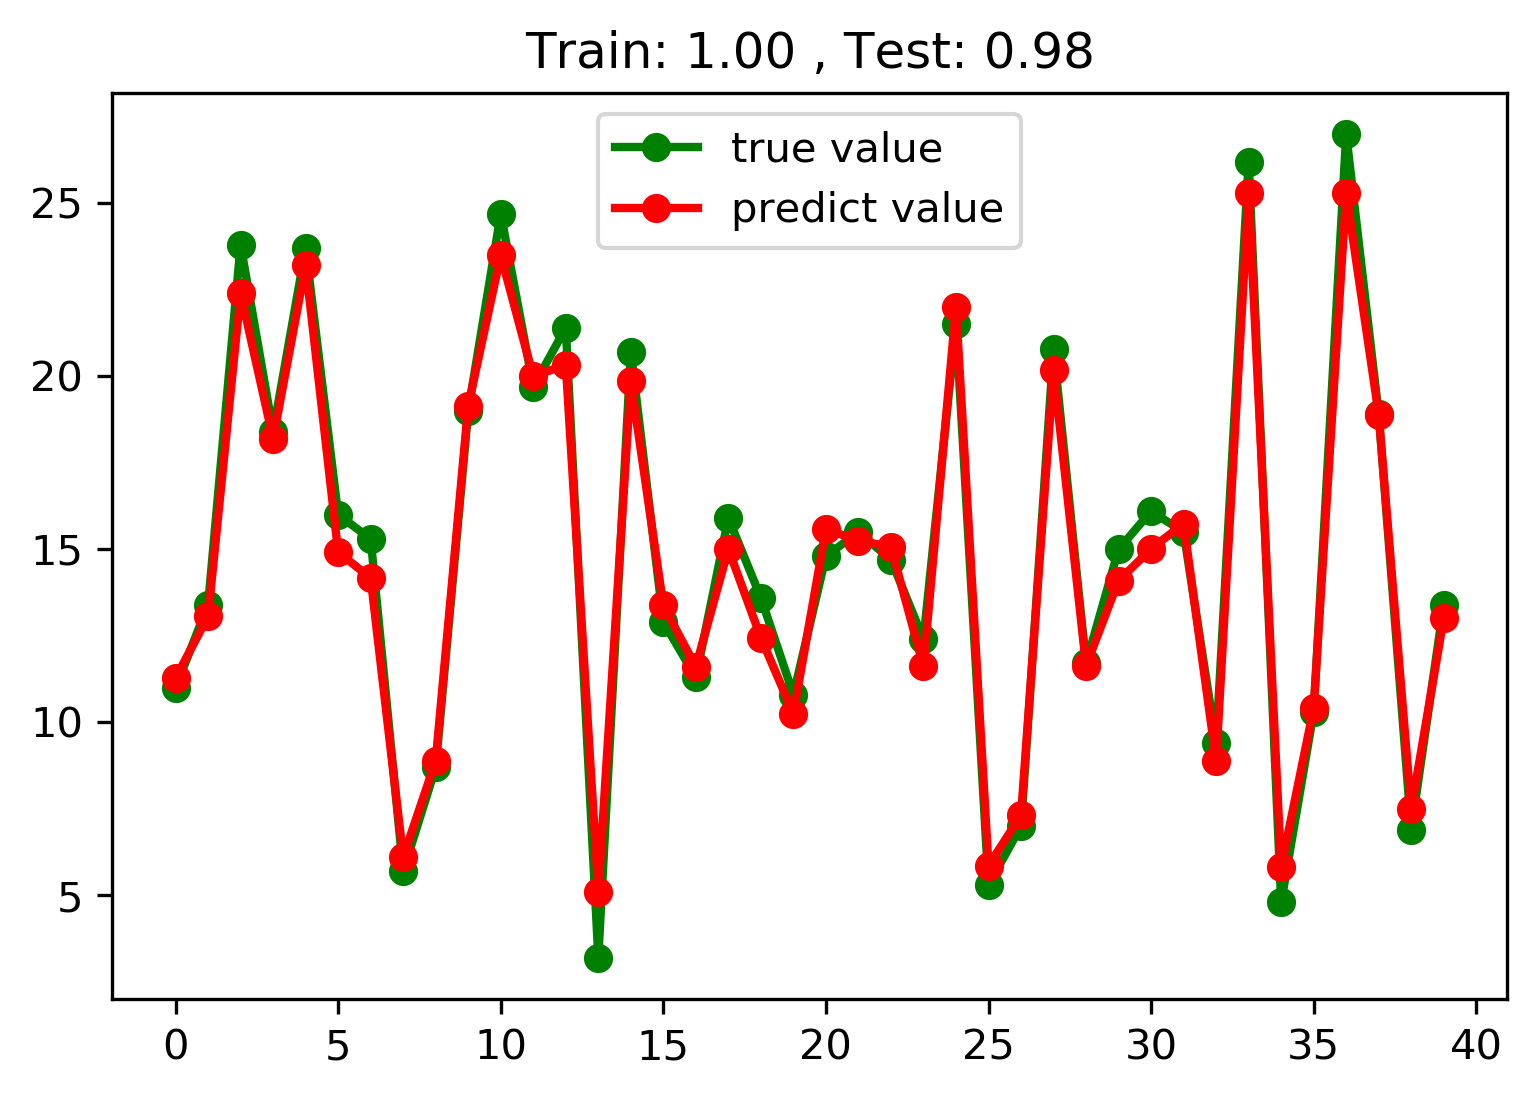

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
rfr = RandomForestRegressor(n_estimators = 20)
Try_Different_Regression(rfr,X_train, y_train, X_test,  y_test)

IT IS THE MIGHTY RANDOM FOREST! 
Both classifier and regression are improved from the decision tree.